Imports and Setup

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
from collections import Counter
from wordcloud import WordCloud
import re

# Display plots inline and set default style
%matplotlib inline
sns.set(style="darkgrid")

Load Dataset and Basic Info

In [44]:
df = pd.read_csv("netflix_titles.csv")
print("🔍 Dataset Shape:", df.shape)
print("\n🧾 Columns:\n", df.columns.tolist())
print("\n📉 Missing Values:\n", df.isnull().sum())

# Add analysis date
today = datetime.today().date()
df['analysis_date'] = today
print("📅 Today's Date:", today)


🔍 Dataset Shape: (8807, 12)

🧾 Columns:
 ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']

📉 Missing Values:
 show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64
📅 Today's Date: 2025-05-23


Movie vs TV Show Count

C:\Users\chandan\AppData\Local\Temp\ipykernel_12700\992635124.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='Set2')


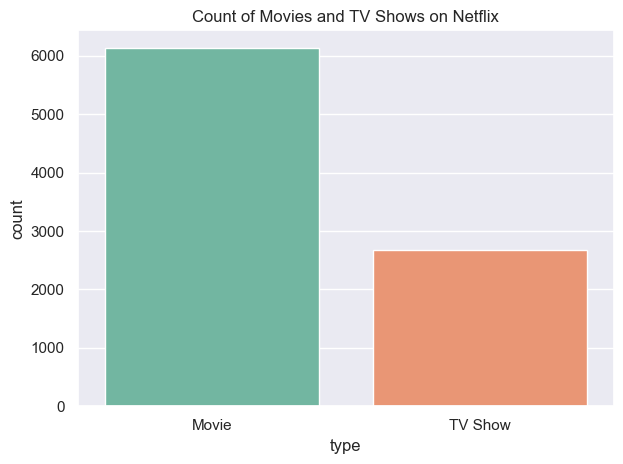

In [48]:
sns.countplot(data=df, x='type', palette='Set2')
plt.title('Count of Movies and TV Shows on Netflix')
plt.tight_layout()
plt.show()


Top 10 Countries Producing Content

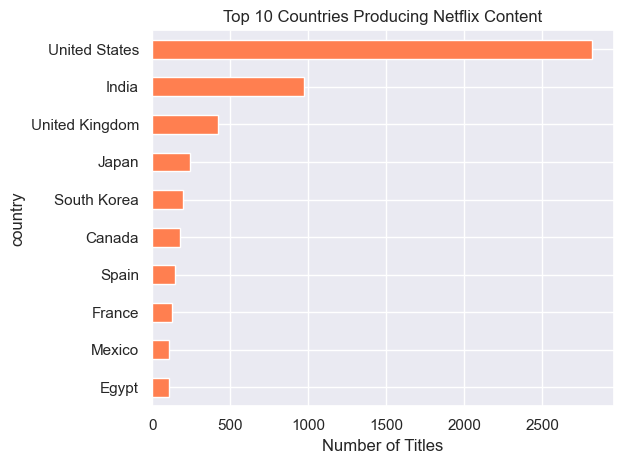

In [49]:
top_countries = df['country'].value_counts().head(10).sort_values()
top_countries.plot(kind='barh', color='coral')
plt.title('Top 10 Countries Producing Netflix Content')
plt.xlabel('Number of Titles')
plt.tight_layout()
plt.show()


Top 10 Genres

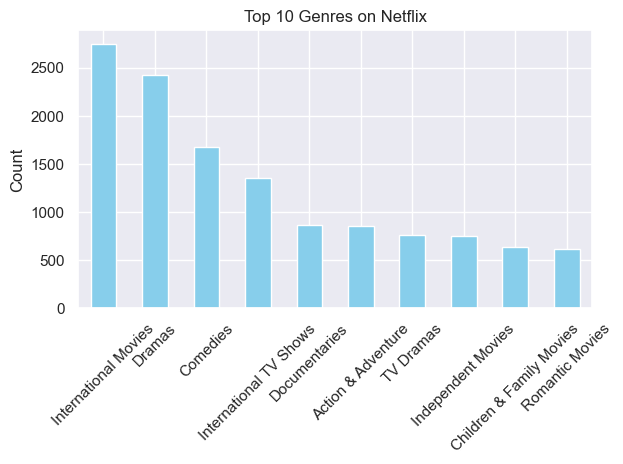

In [50]:

genre_series = df['listed_in'].dropna().apply(lambda x: re.split(r'\s*,\s*', x.strip()))
genres = Counter([genre for sublist in genre_series for genre in sublist])
pd.Series(genres).sort_values(ascending=False).head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Genres on Netflix")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Date Formatting and Feature Extraction

In [51]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df['day_added'] = df['date_added'].dt.day


 Titles Added Each Year

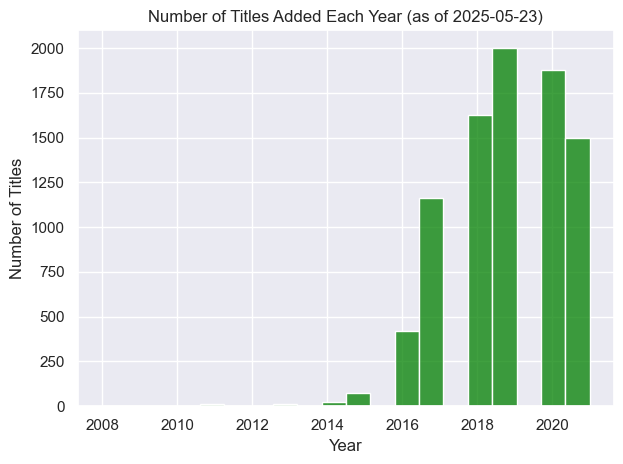

In [52]:
sns.histplot(df['year_added'].dropna(), bins=20, kde=False, color='green')
plt.title(f'Number of Titles Added Each Year (as of {today})')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.tight_layout()
plt.show()


Titles Added by Month

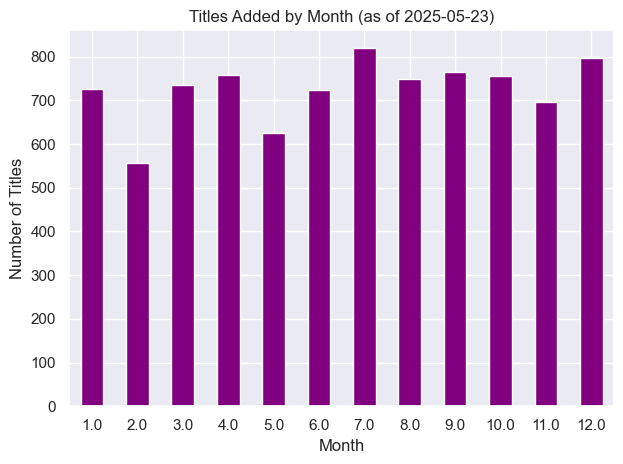

In [53]:

df['month_added'].value_counts().sort_index().plot(kind='bar', color='purple')
plt.title(f'Titles Added by Month (as of {today})')
plt.xlabel('Month')
plt.ylabel('Number of Titles')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Titles Added by Day of Month

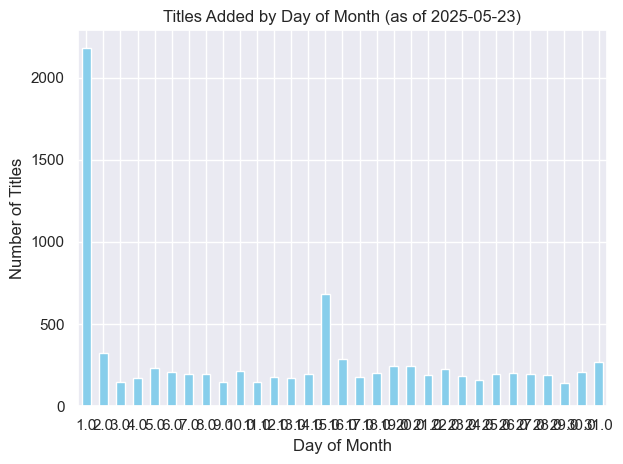

In [54]:
df['day_added'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title(f'Titles Added by Day of Month (as of {today})')
plt.xlabel('Day of Month')
plt.ylabel('Number of Titles')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Top 10 Frequent Actors

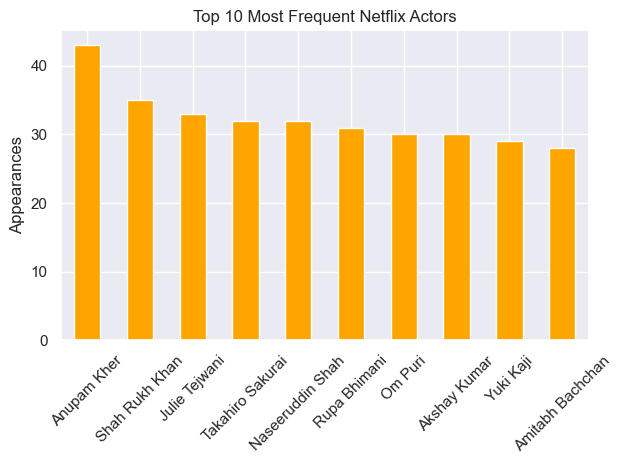

In [55]:
actor_series = df['cast'].dropna().apply(lambda x: x.split(', '))
actor_flat = [actor.strip() for sublist in actor_series for actor in sublist]
top_actors = pd.Series(actor_flat).value_counts().head(10)

top_actors.plot(kind='bar', color='orange')
plt.title('Top 10 Most Frequent Netflix Actors')
plt.ylabel('Appearances')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Top 10 Directors

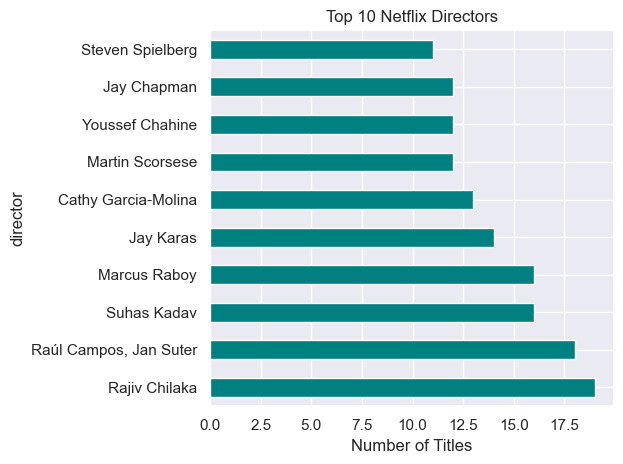

In [56]:
director_series = df['director'].dropna().value_counts().head(10)

director_series.plot(kind='barh', color='teal')
plt.title('Top 10 Netflix Directors')
plt.xlabel('Number of Titles')
plt.tight_layout()
plt.show()


Movie and TV Duration Extraction and Plot

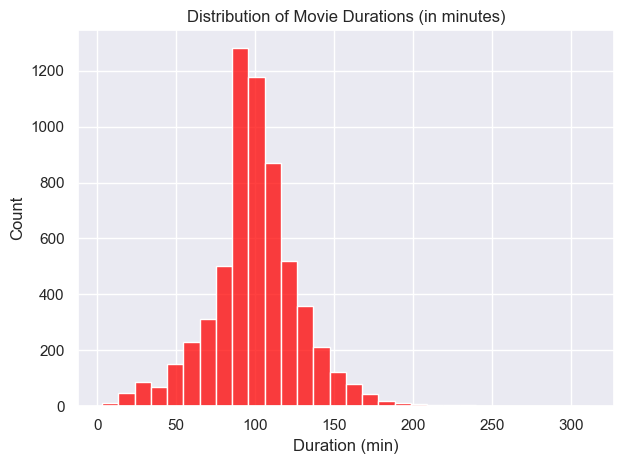

In [57]:
movies = df[df['type'] == 'Movie'].copy()
tv_shows = df[df['type'] == 'TV Show'].copy()

# Extract numbers safely
movies['duration_int'] = movies['duration'].str.extract(r'(\d+)').astype('Int64')
tv_shows['duration_season'] = tv_shows['duration'].str.extract(r'(\d+)').astype('Float64')

# Plot movie durations
sns.histplot(movies['duration_int'].dropna(), bins=30, color='red')
plt.title('Distribution of Movie Durations (in minutes)')
plt.xlabel('Duration (min)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


Duration Debug Info

In [58]:
print("Missing 'duration' values:", df['duration'].isna().sum())
print("Sample 'duration' values:", df['duration'].dropna().unique()[:20])


Missing 'duration' values: 3
Sample 'duration' values: ['90 min' '2 Seasons' '1 Season' '91 min' '125 min' '9 Seasons' '104 min'
 '127 min' '4 Seasons' '67 min' '94 min' '5 Seasons' '161 min' '61 min'
 '166 min' '147 min' '103 min' '97 min' '106 min' '111 min']


Genre Word Cloud

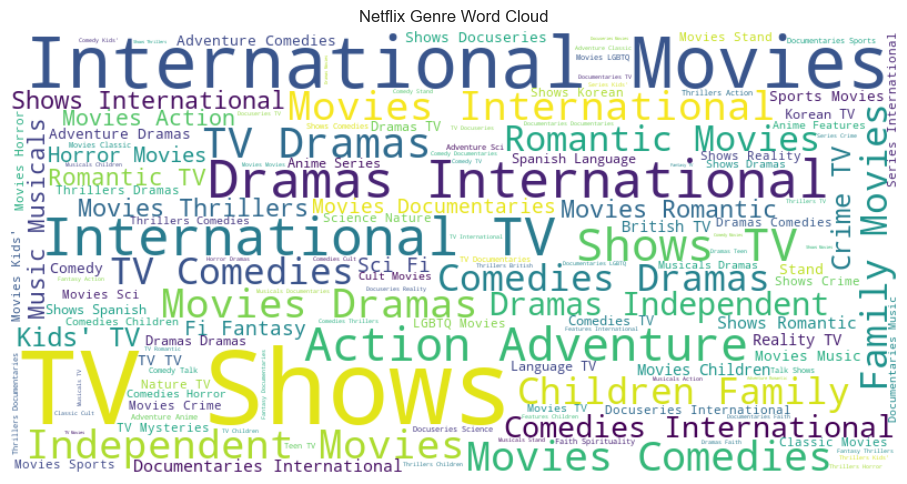

In [60]:
text = " ".join(genre for genre in df['listed_in'].dropna())
wordcloud = WordCloud(background_color="white", width=800, height=400).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Netflix Genre Word Cloud")
plt.tight_layout()
plt.show()
